<div style=" background-color: RGB(0,114,200);" >
<h1 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">PROJET 4 DATA ANALYST</h1>
<h2 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">Réalisez une étude de santé publique avec R ou Python
</h2>
</div>

# OBJECTIF DE CE NOTEBOOK

Bienvenue dans l'outil plébiscité par les analystes de données Jupyter.

Il s'agit d'un outil permettant de mixer et d'alterner codes, textes et graphique.

Cet outil est formidable pour plusieurs raisons:

+ il permet de tester des lignes de codes au fur et à mesure de votre rédaction, de constater immédiatement le résultat d'un instruction, de la corriger si nécessaire.
+ De rédiger du texte pour expliquer l'approche suivie ou les résultats d'une analyse et de le mettre en forme grâce à du code html ou plus simple avec **Markdown**
+ d'agrémenter de graphiques

Pour vous aider dans vos premiers pas à l'usage de Jupyter et de Python, nous avons rédigé ce notebook en vous indiquant les instructions à suivre.

Il vous suffit pour cela de saisir le code Python répondant à l'instruction donnée.

Vous verrez de temps à autre le code Python répondant à une instruction donnée mais cela est fait pour vous aider à comprendre la nature du travail qui vous est demandée.

Et garder à l'esprit, qu'il n'y a pas de solution unique pour résoudre un problème et qu'il y a autant de résolutions de problèmes que de développeurs ;)...



Note jeremy 
Est ce qu'il faut faire le calcul de la sous nutrition sur les pays qu'on a ? 
Est ce qu'il faut faire des graphiques ?
Rajouter le soja
La liste des céréales est difficile a trouver ...

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 1 - Importation des librairies et chargement des fichiers</h2>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.1 - Importation des librairies</h3>
</div>

In [1]:
#Importation de la librairie Pandas;numpy;matplotlib et seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.2 - Chargement des fichiers Excel</h3>
</div>

In [2]:
#Importation du fichier population.csv
population = pd.read_csv('population.csv')

#Importation du fichier dispo_alimentaire.csv

dispo_alimentaire = pd.read_csv('dispo_alimentaire.csv')
#Importation du fichier aide_alimentaire.csv
aide_alimentaire = pd.read_csv('aide_alimentaire.csv')

#Importation du fichier sous_nutrition.csv
sous_nutrition = pd.read_csv('sous_nutrition.csv')

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 2 - Analyse exploratoire des fichiers</h2>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.1 - Analyse exploratoire du fichier population</h3>
</div>

In [3]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(population.shape[0]))
print("Le tableau comporte {} colonne(s)".format(population.shape[1]))

Le tableau comporte 1416 observation(s) ou article(s)
Le tableau comporte 3 colonne(s)


In [4]:
#Consulter le nombre de colonnes
print("Le tableau comporte {} colonne(s)".format(population.shape[1]))
#La nature des données dans chacune des colonnes
print(population.info())
#Le nombre de valeurs présentes dans chacune des colonnes
print(population.count())


Le tableau comporte 3 colonne(s)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1416 entries, 0 to 1415
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Zone    1416 non-null   object 
 1   Année   1416 non-null   int64  
 2   Valeur  1416 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 33.3+ KB
None
Zone      1416
Année     1416
Valeur    1416
dtype: int64


In [5]:
#Affichage les 5 premières lignes de la table
population.head()

,Zone,Année,Valeur
0,Afghanistan,2013,32269.589
1,Afghanistan,2014,33370.794
2,Afghanistan,2015,34413.603
3,Afghanistan,2016,35383.032
4,Afghanistan,2017,36296.113


In [6]:
#Nous allons harmoniser les unités. Pour cela, nous avons décidé de multiplier la population par 1000
#Multiplication de la colonne valeur par 1000
population['Valeur']=population['Valeur']*1000

In [7]:
#changement du nom de la colonne Valeur par Population
population.rename(columns={'Valeur':'Population'}, inplace=True )

In [8]:
#Affichage les 5 premières lignes de la table pour voir les modifications
population.head()

,Zone,Année,Population
0,Afghanistan,2013,32269589.0
1,Afghanistan,2014,33370794.0
2,Afghanistan,2015,34413603.0
3,Afghanistan,2016,35383032.0
4,Afghanistan,2017,36296113.0


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.2 - Analyse exploratoire du fichier disponibilité alimentaire</h3>
</div>

In [9]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(dispo_alimentaire.shape[0]))
print("Le tableau comporte {} colonne(s)".format(dispo_alimentaire.shape[1]))

Le tableau comporte 15605 observation(s) ou article(s)
Le tableau comporte 18 colonne(s)


In [10]:
#Consulter le nombre de colonnes
dispo_alimentaire.shape[1]

18

In [11]:
#Affichage les 5 premières lignes de la table
dispo_alimentaire.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN


In [12]:
#remplacement des NaN dans le dataset par des 0
dispo_alimentaire.fillna(0, inplace=True)

In [13]:
#multiplication de toutes les lignes contenant des milliers de tonnes en Kg
indices_colonnes_tonnes = list(range(3, 5)) + list(range(8, 18)) 
dispo_alimentaire.iloc[:, indices_colonnes_tonnes] = dispo_alimentaire.iloc[:, indices_colonnes_tonnes] * 1000


In [14]:
#Affichage les 5 premières lignes de la table
dispo_alimentaire.head()


,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,770.0,53000.0,0.0,0.0,53000.0,0.0,53000.0,0.0,0.0,0.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,20.0,41000.0,2000.0,40000.0,39000.0,2000.0,3000.0,0.0,0.0,0.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,30.0,2000.0,0.0,2000.0,2000.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,50.0,82000.0,0.0,82000.0,82000.0,0.0,0.0,0.0,0.0,0.0


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.3 - Analyse exploratoire du fichier aide alimentaire</h3>
</div>

In [15]:
#Afficher les dimensions du dataset
aide_alimentaire.shape

(1475, 4)

In [16]:
#Consulter le nombre de colonnes
numero_colonnes= aide_alimentaire.shape[1]
print(f"Le nombre de colonnes dans aide_alimentaire est ({numero_colonnes})")

Le nombre de colonnes dans aide_alimentaire est (4)


In [17]:
#Affichage les 5 premières lignes de la table
aide_alimentaire.head()

,Pays bénéficiaire,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160
4,Afghanistan,2013,Céréales,40504


In [18]:
#changement du nom de la colonne Pays bénéficiaire par Zone
aide_alimentaire.rename(columns={"Pays bénéficiaire":"Zone"}, inplace=True)

In [19]:
#Multiplication de la colonne Aide_alimentaire qui contient des tonnes par 1000 pour avoir des kg
aide_alimentaire['Valeur']=aide_alimentaire['Valeur']*1000

In [20]:
#Affichage les 5 premières lignes de la table
aide_alimentaire.head()

,Zone,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682000
1,Afghanistan,2014,Autres non-céréales,335000
2,Afghanistan,2013,Blé et Farin,39224000
3,Afghanistan,2014,Blé et Farin,15160000
4,Afghanistan,2013,Céréales,40504000


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.3 - Analyse exploratoire du fichier sous nutrition</h3>
</div>

In [21]:
#Afficher les dimensions du dataset
sous_nutrition.shape

(1218, 3)

In [22]:
#Consulter le nombre de colonnes
numero_colonnes= sous_nutrition.shape[1]
print(f"Le nombre de colonnes dans sous_nutrition est ({numero_colonnes})")

Le nombre de colonnes dans sous_nutrition est (3)


In [23]:
#Conversion de la colonne sous nutrition en numérique
sous_nutrition['Valeur'] = sous_nutrition['Valeur'].replace('<0.1', float('NaN'))
sous_nutrition['Valeur']= sous_nutrition['Valeur'].astype(float)

In [24]:
#Conversion de la colonne (avec l'argument errors=coerce qui permet de convertir automatiquement les lignes qui ne sont pas des nombres en NaN)
#Puis remplacement des NaN en 0
sous_nutrition['Valeur'] = pd.to_numeric(sous_nutrition['Valeur'], errors='coerce')

In [25]:
#changement du nom de la colonne Valeur par sous_nutrition
sous_nutrition.rename(columns={"Valeur":"sous_nutrition"}, inplace=True)

In [26]:
#Multiplication de la colonne sous_nutrition par 1000000
sous_nutrition['sous_nutrition']=sous_nutrition['sous_nutrition']*1000000

In [27]:
#Afficher les 5 premières lignes de la table
sous_nutrition.head()

,Zone,Année,sous_nutrition
0,Afghanistan,2012-2014,8600000.0
1,Afghanistan,2013-2015,8800000.0
2,Afghanistan,2014-2016,8900000.0
3,Afghanistan,2015-2017,9700000.0
4,Afghanistan,2016-2018,10500000.0


In [28]:
#Afficher les 5 premières lignes de la table
sous_nutrition.head()

,Zone,Année,sous_nutrition
0,Afghanistan,2012-2014,8600000.0
1,Afghanistan,2013-2015,8800000.0
2,Afghanistan,2014-2016,8900000.0
3,Afghanistan,2015-2017,9700000.0
4,Afghanistan,2016-2018,10500000.0


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.1 - Proportion de personnes en sous nutrition</h3>
</div>

In [29]:
# Il faut tout d'abord faire une jointure entre la table population et la table sous nutrition, en ciblant l'année 2017
population_alimenation=pd.merge(sous_nutrition.loc[sous_nutrition['Année']=='2016-2018',['sous_nutrition', 'Zone']],
                             population.loc[population['Année']==2017,['Population','Zone']], on='Zone')

In [30]:
#Affichage du dataset
population_alimenation.head()

,sous_nutrition,Zone,Population
0,10500000.0,Afghanistan,36296113.0
1,3100000.0,Afrique du Sud,57009756.0
2,100000.0,Albanie,2884169.0
3,1300000.0,Algérie,41389189.0
4,NaN,Allemagne,82658409.0


In [31]:
#Calcul et affichage du nombre de personnes en état de sous nutrition
personnes_sous_nutrition = population_alimenation['sous_nutrition'].sum()
print("Nombre de personne en sous nutrition en 2017 =",personnes_sous_nutrition)
#popullation en 2017
population_2017= population.loc[population['Année']==2017]
population_mondiale_2017=population_2017['Population'].sum()
print("Population mondiale en 2017 =",population_mondiale_2017)
#) Proportion de personnes en état de sous-nutrition en 2017
pourcentage=round((personnes_sous_nutrition/population_mondiale_2017)*100,2)
print("Le taux de sous-nutrition en 2017 =", pourcentage,'%')

Nombre de personne en sous nutrition en 2017 = 535700000.0
Population mondiale en 2017 = 7548134111.0
Le taux de sous-nutrition en 2017 = 7.1 %


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.2 - Nombre théorique de personne qui pourrait être nourries</h3>
</div>

In [32]:
#Combien mange en moyenne un être humain ? Source => 
#2500 kilocalories par jour          #Source =>Wikipedia
cal_moyenne=2500

In [33]:
#On commence par faire une jointure entre le data frame population et Dispo_alimentaire afin d'ajouter dans ce dernier la population
population_dispo_alimenation=pd.merge(dispo_alimentaire,population, on='Zone',how="left")

In [34]:
#Affichage du nouveau dataframe
population_dispo_alimenation.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Année,Population
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.2,770.0,53000.0,0.0,0.0,53000.0,0.0,53000.0,0.0,0.0,0.0,2013.0,32269589.0
1,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.2,770.0,53000.0,0.0,0.0,53000.0,0.0,53000.0,0.0,0.0,0.0,2014.0,33370794.0
2,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.2,770.0,53000.0,0.0,0.0,53000.0,0.0,53000.0,0.0,0.0,0.0,2015.0,34413603.0
3,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.2,770.0,53000.0,0.0,0.0,53000.0,0.0,53000.0,0.0,0.0,0.0,2016.0,35383032.0
4,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.2,770.0,53000.0,0.0,0.0,53000.0,0.0,53000.0,0.0,0.0,0.0,2017.0,36296113.0


In [35]:
#Création de la colonne dispo_kcal avec calcul des kcal disponibles mondialement
population_dispo_alimenation["kcal disponibles total"] = (population_dispo_alimenation["Population"]) * 365 * population_dispo_alimenation["Disponibilité alimentaire (Kcal/personne/jour)"]
kcal_disponibles_2017 = population_dispo_alimenation.loc[population_dispo_alimenation['Année'] == 2017]
kcal_disponibles_2017.head()
# Calcul de la disponibilité alimentaire (Kcal) totale
Kacldispo_2017=kcal_disponibles_2017["kcal disponibles total"].sum()
print("la disponibilité alimentaire (Kcal) totale =",Kacldispo_2017,"(Kcal)")

la disponibilité alimentaire (Kcal) totale = 7635429388975815.0 (Kcal)


In [37]:
#Calcul du nombre d'humains pouvant être nourris
personnes= round((Kacldispo_2017) / (cal_moyenne*365),0)
print("Le nombre d'humains pouvant être nourris =",personnes,"personne")
#Calcul Proportion de personnes en état de sous-nutrition en 2017
Proportion_sousnutrition= round((personnes)*100/(population_mondiale_2017),2)
print("La Proportion de personnes pouvant être nourris en 2017 =",Proportion_sousnutrition,"%")

Le nombre d'humains pouvant être nourris = 8367593851.0 personne
La Proportion de personnes pouvant être nourris en 2017 = 110.86 %


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.3 - Nombre théorique de personne qui pourrait être nourrie avec les produits végétaux</h3>
</div>

In [38]:
#Transfert des données avec les végétaux dans un nouveau dataframe
dataveg=population_dispo_alimenation.loc[(population_dispo_alimenation['Origine']=='vegetale') & (population_dispo_alimenation['Année']==2017),:]
dataveg.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,...,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Année,Population,kcal disponibles total
10,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,20.0,41000.0,...,40000.0,39000.0,2000.0,3000.0,0.0,0.0,0.0,2017.0,36296113.0,1.324808e+10
16,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,30.0,2000.0,...,2000.0,2000.0,0.0,0.0,0.0,0.0,0.0,2017.0,36296113.0,1.324808e+10
22,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017.0,36296113.0,0.000000e+00
28,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,50.0,82000.0,...,82000.0,82000.0,0.0,0.0,0.0,0.0,0.0,2017.0,36296113.0,5.299232e+10
40,Afghanistan,Bière,vegetale,0.0,0.0,0.0,0.09,0.00,0.0,3000.0,...,3000.0,3000.0,0.0,0.0,0.0,0.0,0.0,2017.0,36296113.0,0.000000e+00


In [39]:
#Calcul du nombre de kcal disponible pour les végétaux
Dispovégétaux=(((dataveg['Population'])*365*dataveg['Disponibilité alimentaire (Kcal/personne/jour)'] ).sum()).round()
print("Le nombre de kcal disponible pour les végétaux =",Dispovégétaux,"kcal")

Le nombre de kcal disponible pour les végétaux = 6300178937197865.0 kcal


In [40]:
#Calcul du nombre d'humains pouvant être nourris avec les végétaux
personnes_veg=round((Dispovégétaux)/(365*cal_moyenne),0)
print("Le nombre d'humains pouvant être nourris avec les végétaux =",personnes_veg,"personne")
# Calcul de la population totale
population_totale_2017= population_mondiale_2017
print("La population totale en 2017 =",population_totale_2017)


Le nombre d'humains pouvant être nourris avec les végétaux = 6904305685.0 personne
La population totale en 2017 = 7548134111.0


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.4 - Utilisation de la disponibilité intérieure</h3>
</div>

In [41]:
#Calcul de la disponibilité totale
#Calcul de la disponibilité totale
#D'abord il faut selectionner les colonnes correspondantes pour cette calculation:
df_disponibilité_intérieure = dispo_alimentaire[['Zone','Aliments pour animaux','Autres Utilisations','Disponibilité intérieure','Exportations - Quantité','Importations - Quantité','Nourriture','Pertes','Production','Semences','Traitement','Variation de stock']] 
df_disponibilité_intérieure.head()
# aggregation les données selon la colonne "Zone"
df_disponibilité_intérieure.groupby('Zone').sum()
#Calcul de la disponibilité intérieure totale
df_disponibilité_intérieure['Disponibilité intérieure'].sum()
print("la disponibilité intérieure totale =",df_disponibilité_intérieure['Disponibilité intérieure'].sum())


la disponibilité intérieure totale = 9848994000.0


Proportion pour 'Aliments pour animaux': 13.24%
Proportion pour 'Pertes': 4.61%
Proportion pour 'Nourriture': 49.51%
Proportion pour 'Semences': 1.57%
Proportion pour 'Traitement': 22.38%
Proportion pour 'Autres Utilisations': 8.78%


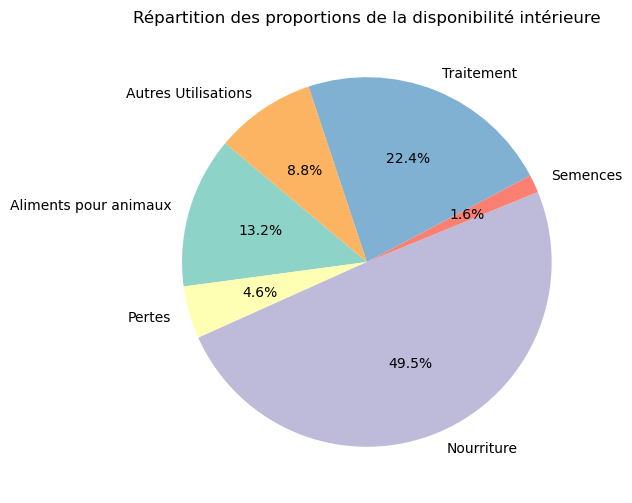

In [53]:
#création d'une boucle for pour afficher les différentes valeurs en fonction des colonnes aliments pour animaux, pertes, nourritures, 
colonnes_a_calculer=['Aliments pour animaux', 'Pertes', 'Nourriture', 'Semences', 'Traitement', 'Autres Utilisations']
proportions = {}
for colonne in ['Aliments pour animaux', 'Pertes', 'Nourriture', 'Semences', 'Traitement', 'Autres Utilisations']:
    proportion = df_disponibilité_intérieure[colonne].sum() / df_disponibilité_intérieure['Disponibilité intérieure'].sum()
    proportions[colonne] = proportion
# Affichage des proportions calculées
for colonne, proportion in proportions.items():
    print(f"Proportion pour '{colonne}': {proportion:.2%}")
 



# camembert
data = pd.DataFrame(proportions.items(), columns=['Catégorie', 'Proportion'])

# Créer le graphique en camembert avec Seaborn (sb)
plt.figure(figsize=(8, 6))
sb.set_palette("Set3")  # Choisir une palette de couleurs

# Utiliser la fonction pie() de Matplotlib avec la palette de couleurs de Seaborn
plt.pie(data['Proportion'], labels=data['Catégorie'], autopct='%1.1f%%', startangle=140)

plt.title("Répartition des proportions de la disponibilité intérieure")
plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.5 - Utilisation des céréales</h3>
</div>

In [54]:
#Création d'une liste avec toutes les variables
cereales_liste = ['Blé', 'Riz (Eq Blanchi)', 'Orge', 'Maïs', 'Seigle', 'Avoine', 'Millet', 'Sorgho', 'Céréales', 'Autres']
dispo_alimentaire.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,770.0,53000.0,0.0,0.0,53000.0,0.0,53000.0,0.0,0.0,0.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,20.0,41000.0,2000.0,40000.0,39000.0,2000.0,3000.0,0.0,0.0,0.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,30.0,2000.0,0.0,2000.0,2000.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,50.0,82000.0,0.0,82000.0,82000.0,0.0,0.0,0.0,0.0,0.0


In [55]:
#Création d'un dataframe avec les informations uniquement pour ces céréales
df_cereales = dispo_alimentaire.loc[dispo_alimentaire.Produit.isin(list(cereales_liste))]
df_cereales.head()



,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
7,Afghanistan,Blé,vegetale,0.0,0.0,1369.0,160.23,4.69,36910.0,5992000.0,0.0,1173000.0,4895000.0,775000.0,5169000.0,322000.0,0.0,-350000.0
32,Afghanistan,Maïs,vegetale,200000.0,0.0,21.0,2.50,0.30,560.0,313000.0,0.0,1000.0,76000.0,31000.0,312000.0,5000.0,0.0,0.0
34,Afghanistan,Millet,vegetale,0.0,0.0,3.0,0.40,0.02,80.0,13000.0,0.0,0.0,12000.0,1000.0,13000.0,0.0,0.0,0.0
40,Afghanistan,Orge,vegetale,360000.0,0.0,26.0,2.92,0.24,790.0,524000.0,0.0,10000.0,89000.0,52000.0,514000.0,22000.0,0.0,0.0
47,Afghanistan,Riz (Eq Blanchi),vegetale,0.0,0.0,141.0,13.82,0.27,2700.0,461000.0,0.0,119000.0,422000.0,24000.0,342000.0,14000.0,0.0,0.0


In [56]:
#Affichage de la proportion d'alimentation animale
dispoAnimaux = df_cereales['Aliments pour animaux'].sum()*100/df_cereales['Disponibilité intérieure'].sum()
print("La proportion de céréales destinée aux animaux est de : {:,.2f} %".format(dispoAnimaux).replace(',', ' '))



La proportion de céréales destinée aux animaux est de : 35.91 %


In [57]:
#Affichage de la proportion d'alimentation animale
dispoHomme = df_cereales['Nourriture'].sum()/df_cereales['Disponibilité intérieure'].sum()*100
print("La proportion de céréales destinée l'alimentation humaine est de : {:,.2f} %".format(dispoHomme).replace(',', ' '))

La proportion de céréales destinée l'alimentation humaine est de : 43.02 %


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.6 - Pays avec la proportion de personnes sous-alimentée la plus forte en 2017</h3>
</div>

In [58]:
#Création de la colonne proportion par pays
population_alimenation['Proportion'] =population_alimenation['sous_nutrition']/population_alimenation['Population']*100
population_alimenation.head()

,sous_nutrition,Zone,Population,Proportion
0,10500000.0,Afghanistan,36296113.0,28.928718
1,3100000.0,Afrique du Sud,57009756.0,5.437666
2,100000.0,Albanie,2884169.0,3.467203
3,1300000.0,Algérie,41389189.0,3.140917
4,NaN,Allemagne,82658409.0,NaN


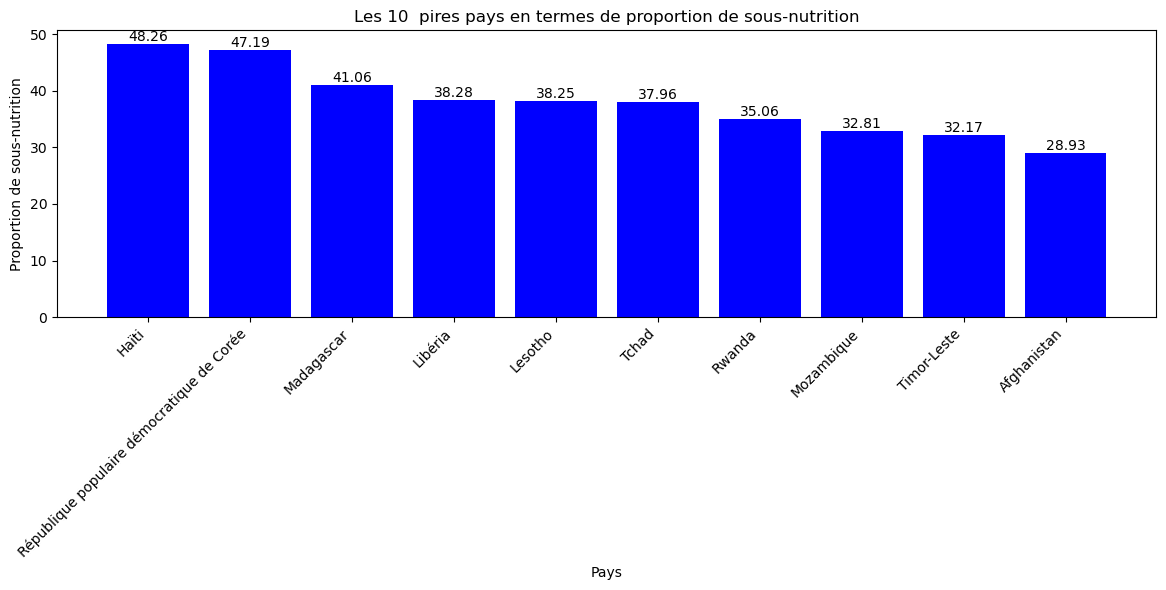

In [59]:
#affichage après trie des 10 pires pays
# classer les données selon la colonne 'proportion'  par ordre décroissant
population_alimenation = population_alimenation.sort_values(by = 'Proportion', ascending = False) 
#affichage après trie des 10 pires pays
population_alimenation.head(10)


# Données
pays = population_alimenation['Zone'].head(10)
proportions = population_alimenation['Proportion'].head(10)

# Création du graphique en barres
plt.figure(figsize=(12, 6))
plt.bar(pays, proportions, color='b')

# Ajout des étiquettes des barres
for i, proportion in enumerate(proportions):
    plt.text(i, proportion, f"{proportion:.2f}", ha='center', va='bottom')

# Ajout des titres et étiquettes d'axe
plt.title('Les 10  pires pays en termes de proportion de sous-nutrition')
plt.xlabel('Pays')
plt.ylabel('Proportion de sous-nutrition')

# Rotation des étiquettes des pays pour une meilleure lisibilité
plt.xticks(rotation=45, ha='right')

# Affichage du graphique
plt.tight_layout()
plt.show()


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.7 - Pays qui ont le plus bénéficié d'aide alimentaire depuis 2013</h3>
</div>

In [60]:
#Filtre sur Pays bénéficiaire et somme des aides
aide_alimentaire_pays = aide_alimentaire.groupby('Zone')['Valeur'].sum().reset_index()
#calcul du total de l'aide alimentaire par pays
aide_alimentaire_pays.head()


,Zone,Valeur
0,Afghanistan,185452000
1,Algérie,81114000
2,Angola,5014000
3,Bangladesh,348188000
4,Bhoutan,2666000


In [61]:
#affichage après trie des 10 pays qui ont bénéficié le plus de l'aide alimentaire
aide_alimentaire_pays = aide_alimentaire_pays.sort_values(by = 'Valeur', ascending = False)

aide_alimentaire_pays.head(10)

,Zone,Valeur
50,République arabe syrienne,1858943000
75,Éthiopie,1381294000
70,Yémen,1206484000
61,Soudan du Sud,695248000
60,Soudan,669784000
30,Kenya,552836000
3,Bangladesh,348188000
59,Somalie,292678000
53,République démocratique du Congo,288502000
43,Niger,276344000


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.8 - Evolution des 5 pays qui ont le plus bénéficiés de l'aide alimentaire entre 2013 et 2016</h3>
</div>

In [62]:
#Création d'un dataframe avec la zone, l'année et l'aide alimentaire puis groupby sur zone et année 
#Sélectionner les colonnes nécessaires (Zone, Année et Valeur)
aide_alimentaire_A = aide_alimentaire[['Zone', 'Année', 'Valeur']]
#groupby sur zone et année 
aide_alimentaire_A  = aide_alimentaire_A .groupby(['Zone', 'Année']).sum().reset_index()
aide_alimentaire_A.head()


,Zone,Année,Valeur
0,Afghanistan,2013,128238000
1,Afghanistan,2014,57214000
2,Algérie,2013,35234000
3,Algérie,2014,18980000
4,Algérie,2015,17424000


In [63]:
#Création d'une liste contenant les 5 pays qui ont le plus bénéficiées de l'aide alimentaire
top_5_pays_list = aide_alimentaire_pays['Zone'].head().tolist()
print(top_5_pays_list)

['République arabe syrienne', 'Éthiopie', 'Yémen', 'Soudan du Sud', 'Soudan']


In [64]:
#On filtre sur le dataframe avec notre liste
df_filtered = aide_alimentaire_A[aide_alimentaire_A['Zone'].isin(top_5_pays_list)]



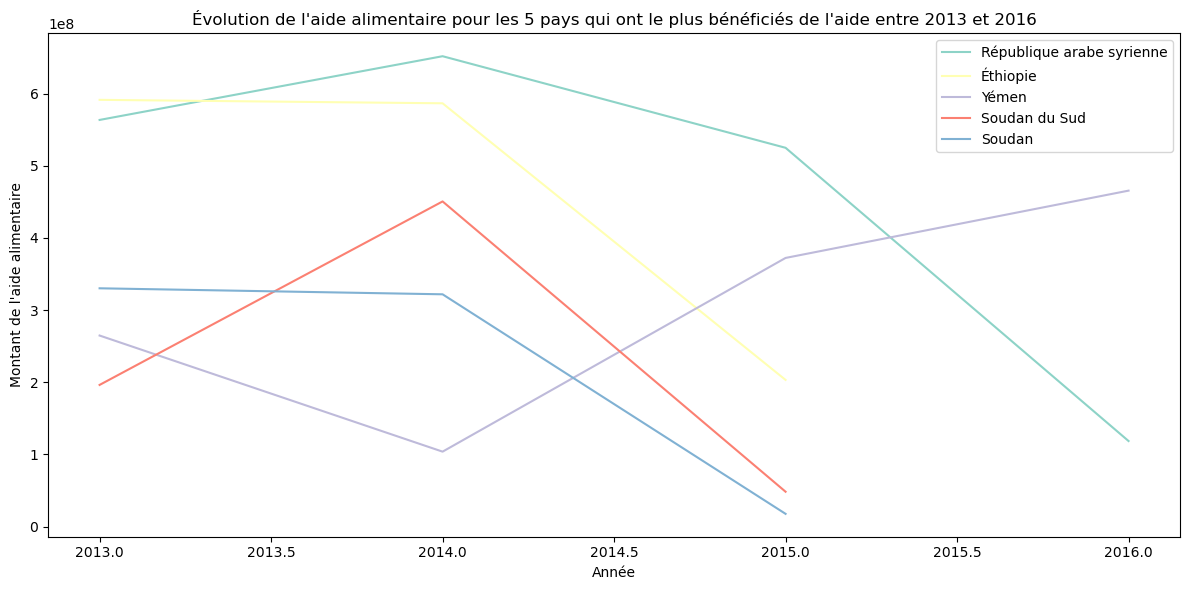

,Zone,Année,Valeur
157,République arabe syrienne,2013,563566000
158,République arabe syrienne,2014,651870000
159,République arabe syrienne,2015,524949000
160,République arabe syrienne,2016,118558000
189,Soudan,2013,330230000
190,Soudan,2014,321904000
191,Soudan,2015,17650000
192,Soudan du Sud,2013,196330000
193,Soudan du Sud,2014,450610000
194,Soudan du Sud,2015,48308000


In [65]:
# Affichage des pays avec l'aide alimentaire par année
df_filtered.head(20)


# Données
pays_list = ['République arabe syrienne', 'Éthiopie', 'Yémen', 'Soudan du Sud', 'Soudan']
df_filtered = df_filtered[df_filtered['Zone'].isin(pays_list)]

# Création du graphique en ligne
plt.figure(figsize=(12, 6))
for pays in pays_list:
    data_pays = df_filtered[df_filtered['Zone'] == pays]
    plt.plot(data_pays['Année'], data_pays['Valeur'], label=pays)

# Ajout des titres et étiquettes d'axe
plt.title("Évolution de l'aide alimentaire pour les 5 pays qui ont le plus bénéficiés de l'aide entre 2013 et 2016")
plt.xlabel('Année')
plt.ylabel("Montant de l'aide alimentaire")
plt.legend()

# Affichage du graphique
plt.tight_layout()
plt.show()
# Affichage des pays avec l'aide alimentaire par année
df_filtered.head(20)

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.9 - Pays avec le moins de disponibilité par habitant</h3>
</div>

In [66]:
#Calcul de la disponibilité en kcal par personne par jour par pays
#Sélection des colonnes Zone et Disponibilité alimentaire
dispo_pays = dispo_alimentaire[['Zone','Disponibilité alimentaire (Kcal/personne/jour)']]
#Calcul de la disponibilité en kcal par personne par jour par pays
dispo_pays = dispo_pays.groupby('Zone').sum()
dispo_pays.head(10)

,Disponibilité alimentaire (Kcal/personne/jour)
Zone,
Afghanistan,2087.0
Afrique du Sud,3020.0
Albanie,3188.0
Algérie,3293.0
Allemagne,3503.0
Angola,2474.0
Antigua-et-Barbuda,2416.0
Arabie saoudite,3255.0
Argentine,3226.0


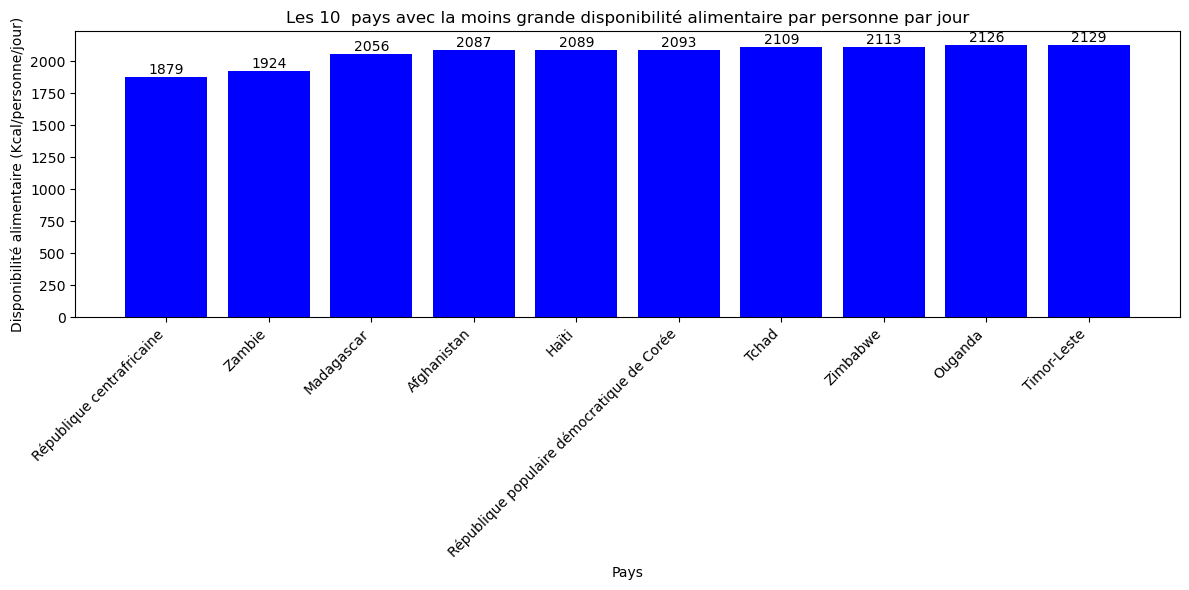

In [67]:
#Affichage des 10 pays qui ont le moins de dispo alimentaire par personne 
pays_lemoinsdispo = dispo_pays.sort_values(by = ['Disponibilité alimentaire (Kcal/personne/jour)'], ascending = True)
pays_lemoinsdispo.head(10)


# Données
top_pays = 10
pays = pays_lemoinsdispo.index[:top_pays]
dispo_alimentaire = pays_lemoinsdispo['Disponibilité alimentaire (Kcal/personne/jour)'].values[:top_pays]

# Création du graphique en barres
plt.figure(figsize=(12, 6))
plt.bar(pays, dispo_alimentaire, color='b')  # Changement de la couleur en bleu

# Ajout des étiquettes des barres
for i, dispo in enumerate(dispo_alimentaire):
    plt.text(i, dispo, f"{dispo:.0f}", ha='center', va='bottom')

# Ajout des titres et étiquettes d'axe
plt.title(f"Les {top_pays}  pays avec la moins grande disponibilité alimentaire par personne par jour")
plt.xlabel('Pays')
plt.ylabel('Disponibilité alimentaire (Kcal/personne/jour)')

# Rotation des étiquettes des pays pour une meilleure lisibilité
plt.xticks(rotation=45, ha='right')

# Affichage du graphique
plt.tight_layout()
plt.show()



<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.10 - Pays avec le plus de disponibilité par habitant</h3>
</div>

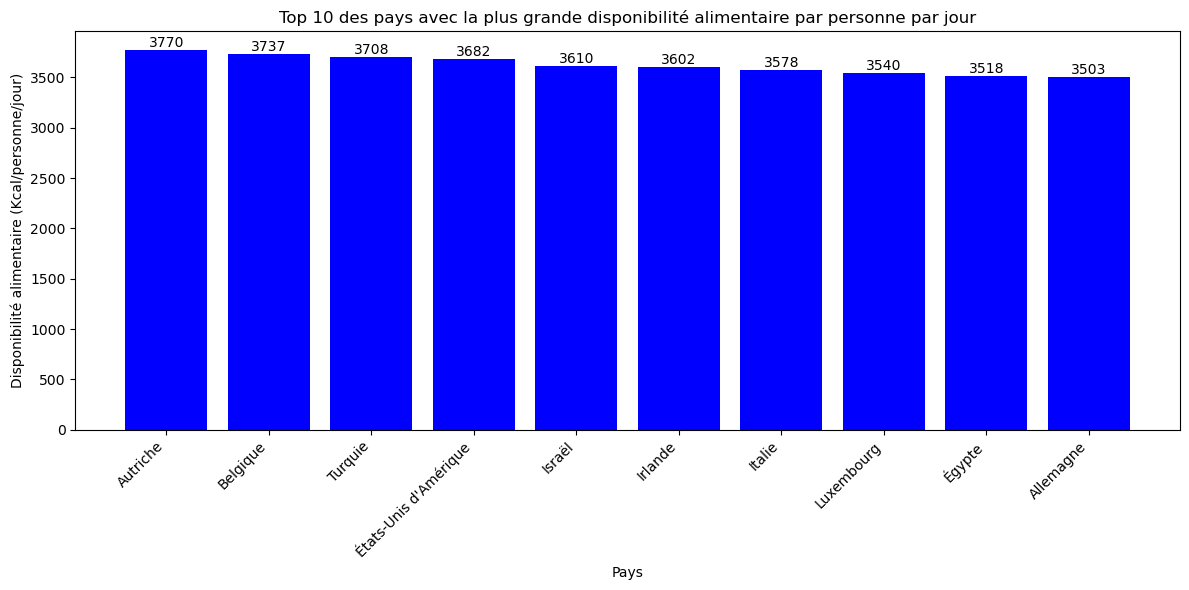

In [68]:
#Affichage des 10 pays qui ont le plus de dispo alimentaire par personne 
pays_leplusdispo = dispo_pays.sort_values(by = ['Disponibilité alimentaire (Kcal/personne/jour)'], ascending = False)
pays_leplusdispo.head(10)


# Données
top_pays = 10
pays = pays_leplusdispo.index[:top_pays]
dispo_alimentaire = pays_leplusdispo['Disponibilité alimentaire (Kcal/personne/jour)'].values[:top_pays]

# Création du graphique en barres
plt.figure(figsize=(12, 6))
plt.bar(pays, dispo_alimentaire, color='b')

# Ajout des étiquettes des barres
for i, dispo in enumerate(dispo_alimentaire):
    plt.text(i, dispo, f"{dispo:.0f}", ha='center', va='bottom')

# Ajout des titres et étiquettes d'axe
plt.title(f"Top {top_pays} des pays avec la plus grande disponibilité alimentaire par personne par jour")
plt.xlabel('Pays')
plt.ylabel('Disponibilité alimentaire (Kcal/personne/jour)')

# Rotation des étiquettes des pays pour une meilleure lisibilité
plt.xticks(rotation=45, ha='right')

# Affichage du graphique
plt.tight_layout()
plt.show()


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.11 - Exemple de la Thaïlande pour le Manioc</h3>
</div>

In [69]:
#création d'un dataframe avec uniquement la Thaïlande 
# Charger les données depuis le fichier CSV en DataFrame
dispo_alimentaire = pd.read_csv('dispo_alimentaire.csv')
dispo_alimentaire.head()
Thaïlande_Manioc=dispo_alimentaire.loc[(dispo_alimentaire['Zone']=='Thaïlande')&(dispo_alimentaire['Produit']=='Manioc'),:]
Thaïlande_Manioc.head()










,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
13809,Thaïlande,Manioc,vegetale,1800.0,2081.0,40.0,13.0,0.05,0.14,6264.0,25214.0,1250.0,871.0,1511.0,30228.0,NaN,0.0,0.0


In [72]:
#Calcul de la sous nutrition en Thaïlande
#nbr_sousnutrition_Thaïlande= sous_nutrition_Thailande['sous_nutrition'].sum()
#print("Le nombre de personnes en sous nutritions en Thailande = ", nbr_sousnutrition_Thaïlande)
#Séléction de la population en sous nutrition sur la Thailande
sous_nutrition_Thailande = population_alimenation[population_alimenation.Zone=='Thaïlande']
proportion = (sous_nutrition_Thailande['sous_nutrition'].sum()/ sous_nutrition_Thailande['Population']\
              .sum())*100
proportion_arrondi = round(proportion, 2)  # Arrondir à 2 décimales
print("La proportion de sous-nutrition en Thaïlande =", proportion_arrondi, "%")


La proportion de sous-nutrition en Thaïlande = 8.96 %


In [73]:
# On calcule la proportion exportée en fonction de la proportion
# On calcule la proportion exportée en fonction de la proportion
# Calcul de la proportion de manioc pour l'exportation
maniocExportation = (Thaïlande_Manioc['Exportations - Quantité'].sum())/(Thaïlande_Manioc \
                                                                                  ['Production'].sum())*100
print(f'La proportion d exportation ',round(maniocExportation,2),"%")
#Séléction de la population en sous nutrition sur la Thailande
sousNutritionThailande = sous_nutrition[sous_nutrition.Zone=='Thaïlande']

sous_nutrition_Thailande.head()

La proportion d exportation  83.41 %


,sous_nutrition,Zone,Population,Proportion
185,6200000.0,Thaïlande,69209810.0,8.958268


<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 6 - Analyse complémentaires</h2>
</div>

In [74]:
#Rajouter en dessous toutes les analyses complémtaires suite à la demande de mélanie :
#"et toutes les infos que tu trouverais utiles pour mettre en relief les pays qui semblent être 
#le plus en difficulté au niveau alimentaire"